In [2]:
import torch
import pandas as pd
from torch import nn
from sklearn.model_selection import train_test_split
import torch.optim as optim
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import torch.nn.init as init
import optuna
from optuna.trial import TrialState

In [3]:
#checking whether GPU memory is usable
torch.cuda.is_available()

True

In [4]:
path = r'C:\studia\magisterka\pliki'

In [5]:
#file import
df_learn2 = pd.read_csv(path + '\df_normalization_to12.csv')
df_learn2 = df_learn2.drop(columns = 'Unnamed: 0')

In [7]:
#changing the order of columns
df_learn2 = df_learn2.reindex(columns=['index', 'age', 'wind', 'year', 'month', 'start_career', 'start_season', 'pb','sb', 'height', 'country_id', 'country_comp_id', 'if_country','city_comp_id', 'Temperature', 'Pressure', 'result'])

#deleting records with empty values
col_nan = []
for col in df_learn2.columns:
    if len(df_learn2[df_learn2[col].isna()]) > 0:
        col_nan.append(col)
for c in col_nan:
    df_learn2 = df_learn2[df_learn2[c].isna() == False]
df_learn2 = df_learn2.reset_index().drop(columns = 'level_0')

In [10]:
df_learn5 = df_learn2[['pb', 'sb', 'start_career', 'start_season', 'year', 'result']]# 'start_career', 'start_season', 'year', 'result']]

In [8]:
#GPU memory setting
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
def concat_tensor(X, Y):
    z = []
    for i in range(len(X)):
        z.append([X[i], Y[i]])
    return z

#division of the set into training and testing data
def set_division(df, batchsize):
    col_num = df.shape[1]
    df_X = df.values[:,0:col_num-1]
    df_Y = df.values[:,col_num-1]
    
    x_train, x_test, y_train, y_test = train_test_split(df_X, df_Y, test_size= 0.3, random_state = 0)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size= 0.3, random_state = 0)
    
    x_train = torch.tensor(x_train, dtype=torch.float).to(device)
    x_test=torch.tensor(x_test, dtype=torch.float).to(device)
    x_valid=torch.tensor(x_valid, dtype=torch.float).to(device)

    y_train = torch.tensor(y_train, dtype=torch.float).to(device)
    y_test=torch.tensor(y_test, dtype=torch.float).to(device)
    y_valid=torch.tensor(y_valid, dtype=torch.float).to(device)
    
    #creating batches
    train_batches = DataLoader(concat_tensor(x_train, y_train), batch_size=batchsize, shuffle=True)
    test_batches = DataLoader(concat_tensor(x_test, y_test), batch_size=batchsize, shuffle=True)
    valid_batches = DataLoader(concat_tensor(x_valid, y_valid), batch_size=batchsize, shuffle=True)

    return train_batches, test_batches, valid_batches

In [11]:
#initialization of model weights
def init_weights(m):
    if isinstance(m, nn.Linear):
        init.xavier_uniform_(m.weight)
        if m.bias is not None:
            init.constant_(m.bias, 0)

## Creating models with a different number of hidden layers

In [12]:
model = nn.Sequential(
    nn.Linear(df_learn2.shape[1]-1, 20),
    nn.Sigmoid(),
    nn.Linear(20, 1)
)
model.to(device)
model.apply(init_weights)   #use of initialization

Sequential(
  (0): Linear(in_features=16, out_features=20, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=20, out_features=1, bias=True)
)

In [13]:
model = nn.Sequential(
    nn.Linear(df_learn2.shape[1]-1, 20),
    nn.ReLU(),
    nn.Linear(20, 100),
    nn.Sigmoid(),
    nn.Linear(100, 1)
)
model.to(device)
model.apply(init_weights)

Sequential(
  (0): Linear(in_features=16, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=100, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=100, out_features=1, bias=True)
)

In [14]:
model = nn.Sequential(
    nn.Linear(df_learn2.shape[1]-1, 20),
    nn.ReLU(),
    nn.Linear(20, 100),
    nn.ReLU(),
    nn.Linear(100, 200),
    nn.Sigmoid(),
    nn.Linear(200, 1)
)
model.to(device)
model.apply(init_weights)

Sequential(
  (0): Linear(in_features=16, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=200, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=200, out_features=1, bias=True)
)

In [15]:
model = nn.Sequential(
    nn.Linear(df_learn2.shape[1]-1, 20),
    nn.ReLU(),
    nn.Linear(20, 100),
    nn.ReLU(),
    nn.Linear(100, 200),
    nn.ReLU(),
    nn.Linear(200, 400),
    nn.Sigmoid(),
    nn.Linear(400, 1)
)
model.to(device)
model.apply(init_weights)

Sequential(
  (0): Linear(in_features=16, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=200, bias=True)
  (5): ReLU()
  (6): Linear(in_features=200, out_features=400, bias=True)
  (7): Sigmoid()
  (8): Linear(in_features=400, out_features=1, bias=True)
)

In [16]:
model = nn.Sequential(
    nn.Linear(df_learn2.shape[1]-1, 20),
    nn.ReLU(),
    nn.Linear(20, 100),
    nn.ReLU(),
    nn.Linear(100, 200),
    nn.ReLU(),
    nn.Linear(200, 400),
    nn.ReLU(),
    nn.Linear(400, 600),
    nn.Sigmoid(),
    nn.Linear(600, 1)
)
model.to(device)
model.apply(init_weights)

Sequential(
  (0): Linear(in_features=16, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=200, bias=True)
  (5): ReLU()
  (6): Linear(in_features=200, out_features=400, bias=True)
  (7): ReLU()
  (8): Linear(in_features=400, out_features=600, bias=True)
  (9): Sigmoid()
  (10): Linear(in_features=600, out_features=1, bias=True)
)

In [17]:
model = nn.Sequential(
    nn.Linear(df_learn2.shape[1]-1, 20),
    nn.ReLU(),
    nn.Linear(20, 100),
    nn.ReLU(),
    nn.Linear(100, 200),
    nn.ReLU(),
    nn.Linear(200, 400),
    nn.ReLU(),
    nn.Linear(400, 600),
    nn.ReLU(),
    nn.Linear(600, 800),
    nn.Sigmoid(),
    nn.Linear(800, 1)
)
model.to(device)
model.apply(init_weights)

Sequential(
  (0): Linear(in_features=16, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=200, bias=True)
  (5): ReLU()
  (6): Linear(in_features=200, out_features=400, bias=True)
  (7): ReLU()
  (8): Linear(in_features=400, out_features=600, bias=True)
  (9): ReLU()
  (10): Linear(in_features=600, out_features=800, bias=True)
  (11): Sigmoid()
  (12): Linear(in_features=800, out_features=1, bias=True)
)

In [18]:
#finding appropriate hyperparameters using the optuna library
def objective(trial, model = model, df = df_learn2):
    criterion = nn.MSELoss()
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "SGD", 'Adadelta', 'Adagrad'])
    lr = trial.suggest_float("lr", 1e-7, 1, log=True)
    epochs = trial.suggest_int('epochs', 5, 50)
    batchsize = trial.suggest_int('batchsize', 2548, 20384, step = 2548)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)

    train_loader, test_loader, valid_loader = set_division(df, batchsize)
    for epoch in range(epochs):
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
        model.eval()
        correct = 0
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(valid_loader):
                data, target = data.to(device), target.to(device)
                output = model(data)
                correct += abs(output - target).sum().item()   
        accuracy = correct/len(valid_loader.dataset)
        
        trial.report(accuracy, epoch)
    return accuracy

In [20]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials= 1)

In [23]:
opt, lr, num_epochs, batchsize = study.best_params.values()
print(opt, lr, num_epochs, batchsize)

Adam 0.00103 5 2548


In [24]:
train_loader, test_loader, valid_loader = set_division(df_learn2, batchsize)

criterion = nn.MSELoss()
train_batches, test_batches, valid_batches = set_division(df_learn2, batchsize)
optimizer = getattr(optim, opt)(model.parameters(), lr = lr)  #getattr - object with an attribute
num_epochs = num_epochs

out = []
los = []
out_test = []
los_test = []
for epoch in range(num_epochs):    
    model.train()
    for inputs, targets in train_batches:
        inputs, targets = inputs.to('cuda'), targets.to('cuda')  
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        if epoch == num_epochs - 1:
            out.append(outputs)
    print(epoch, loss.item())
    los.append(loss.item())
    
    model.eval()
    total_test_loss = 0
    for inp, tar in test_batches:
        inp, tar = inp.to('cuda'), tar.to('cuda')
        outpu = model(inp)
        test_loss = criterion(outpu, tar)
        total_test_loss += test_loss.item()
        
        if epoch == num_epochs - 1:
            out_test.append(outpu)
    los_test.append(test_loss.item())

0 0.18884144723415375
1 0.10957171767950058
2 0.10060397535562515
3 0.1026972159743309
4 0.10301677137613297


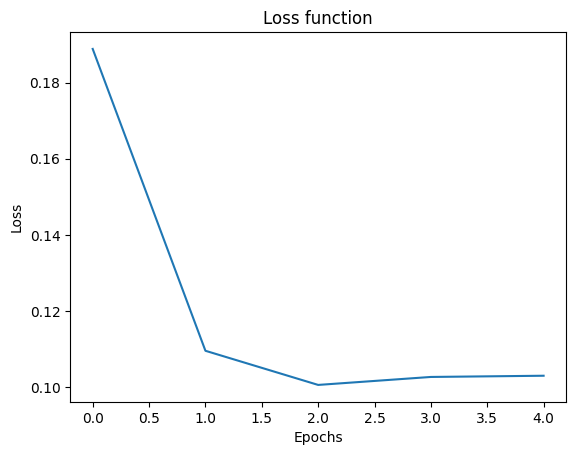

In [25]:
plt.plot(los)#shows plot of the presented system
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [32]:
#error on test set
err = 0
for i, (x, y) in enumerate(test_batches):
    for j, z in enumerate(y):
        err += abs(out_test[i][j].item() - z.item())
error = err/(sum(tensor.numel() for tensor in out_test))
print('error = ', round(error, 4))

error =  0.2548


In [33]:
#error on train set
err2 = 0
for i, (x, y) in enumerate(train_batches):
    for j, z in enumerate(y):
        err2 += abs(out[i][j].item() - z.item())
error2 = err2/(sum(tensor.numel() for tensor in out))
print('error = ', round(error2, 4))

error =  0.1924
